<a href="https://colab.research.google.com/github/yassarmohammed87/SpaceShipTitanic-Kaggle/blob/main/Spaceship_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle competitions download -c spaceship-titanic


  0% 0.00/299k [00:00<?, ?B/s]
100% 299k/299k [00:00<00:00, 74.5MB/s]


In [ ]:
!mkdir spaceTitanic 
!cp train.csv ./spaceTitanic/
!cp test.csv ./spaceTitanic/
!rm -rf test.csv
!rm -rf train.csv

In [ ]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.8 MB 1.3 MB/s 


In [2]:
!pip install BorutaShap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.3 MB/s 


In [3]:
!pip install category_encoders


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 659 kB/s 


# Imports

In [4]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn_pandas import CategoricalImputer
import xgboost as xgb
from catboost import CatBoostClassifier, Pool
from sklearn.feature_selection import RFECV
import category_encoders as ce
from BorutaShap import BorutaShap
import joblib



In [5]:
df=pd.read_csv('./drive/MyDrive/spaceTitanic/train.csv')
df.head(20)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [ ]:
df.loc[(df['CryoSleep'].isna()) & (df['Age']<=10)]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
92,0099_02,Earth,NaN,G/12/P,TRAPPIST-1e,2.0,False,0.0,0.0,0.0,0.0,0.0,Thewis Connelson,True
682,0712_02,Mars,NaN,F/150/P,TRAPPIST-1e,2.0,False,0.0,0.0,0.0,0.0,0.0,Crans Apeau,True
1531,1624_03,Earth,NaN,G/250/S,TRAPPIST-1e,4.0,False,0.0,0.0,0.0,0.0,NaN,Eristy Barbes,True
2134,2291_01,Earth,NaN,G/365/S,55 Cancri e,6.0,False,0.0,0.0,0.0,NaN,0.0,Patoya Pittler,False
2419,2595_02,Mars,NaN,F/533/P,TRAPPIST-1e,4.0,False,0.0,0.0,0.0,0.0,0.0,Ban Cakie,True
2639,2822_02,Earth,NaN,G/450/S,TRAPPIST-1e,5.0,NaN,0.0,0.0,0.0,0.0,NaN,Salley Harverez,False
3232,3476_01,Earth,NaN,G/571/P,55 Cancri e,4.0,False,0.0,NaN,0.0,0.0,0.0,Gabrie Joycerton,True
4461,4741_03,Mars,NaN,F/961/P,TRAPPIST-1e,6.0,False,0.0,0.0,0.0,0.0,0.0,Oslos Bau,True
4768,5090_01,Earth,NaN,G/821/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,NaN,False
4880,5205_03,Earth,NaN,G/845/S,TRAPPIST-1e,3.0,False,0.0,0.0,0.0,0.0,0.0,Dorene Roachez,True


## Function to compare 2 categorical columns 

In [6]:
def category_comp_plot(df,by,forCol):
  col_series=df[by].value_counts().index
  
  fig, axs = plt.subplots(1, len(col_series), figsize=(12, 5))
  plt.subplots_adjust(right=1.5)
  for i,category in enumerate(col_series):
    plt.subplot(1,len(col_series),i+1)
    sns.countplot(data=df.loc[df[by]==category],x=forCol)
    plt.title(category)

## Function to compare continous features with categorical features

In [7]:
def numeric_comp_plot(df,by,forCol,binwidth,xlim=None,ylim=None):
  my_df=df.copy()
  my_df[by].fillna(my_df[by].median(),inplace=True)
  my_df[by]=my_df[by].astype('int')
  sns.histplot(data=my_df,x=by,hue=forCol,binwidth=binwidth)
  plt.xlim(xlim)
  plt.ylim(ylim)

#Checking significance of VIP column

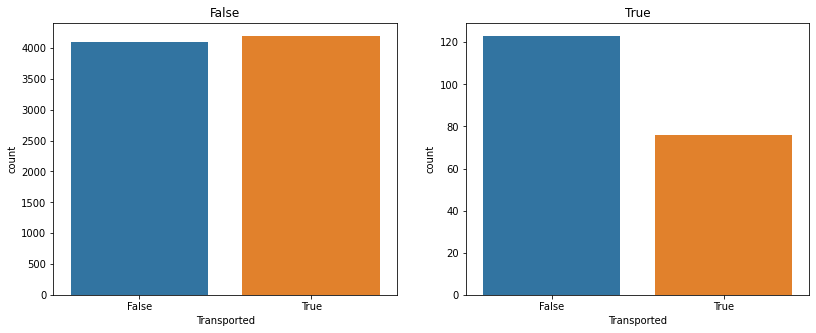

In [ ]:
category_comp_plot(df,'VIP','Transported')


Doesn't look like being a VIP contributes heavily to whether a person is transported or not

#Checking significance of HomePlanet



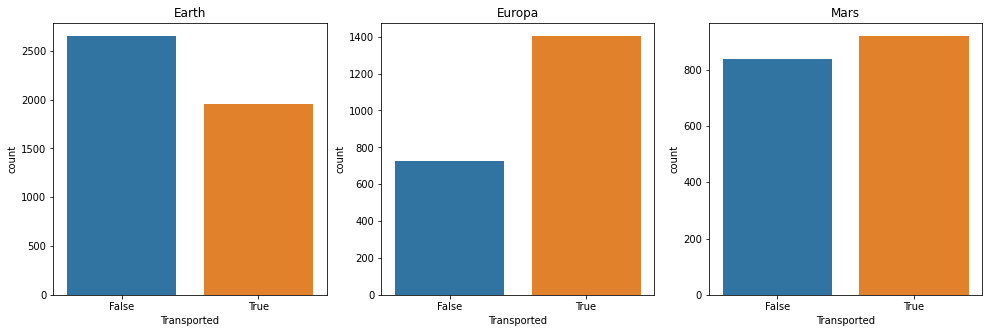

In [ ]:
category_comp_plot(df,'HomePlanet','Transported')

#Checking significance of CryoSleep


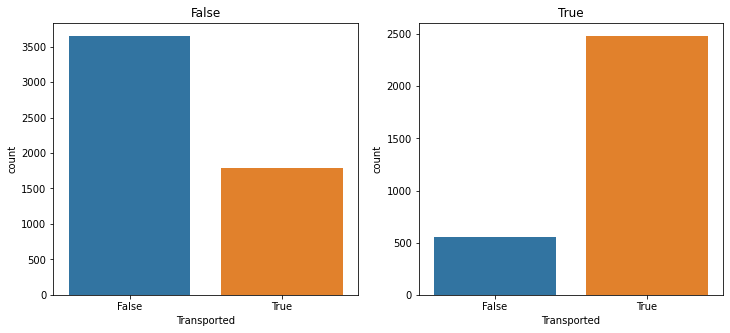

In [ ]:
category_comp_plot(df,'CryoSleep','Transported')

#Splitting and checking significance of different parts of Cabin


##Deck

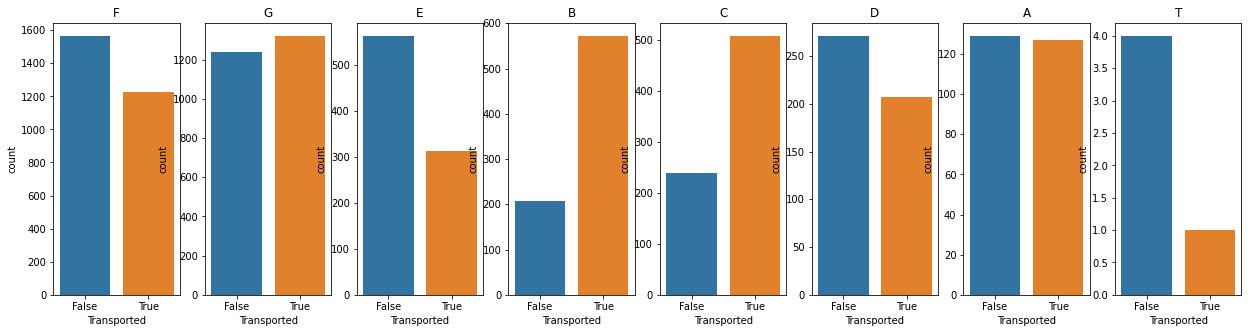

In [ ]:
df['deck']=df['Cabin'].str.split('/',expand=True)[0]
category_comp_plot(df,'deck','Transported')

## Cabin Number

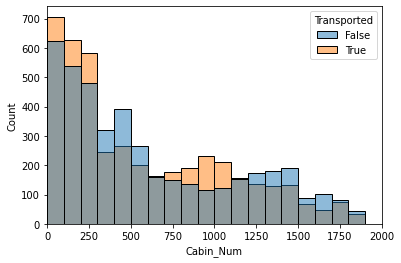

In [ ]:
df['Cabin_Num']=df['Cabin'].str.split('/',expand=True)[1]
numeric_comp_plot(df,'Cabin_Num',forCol='Transported',binwidth=100,xlim=[0,2000])

## Port

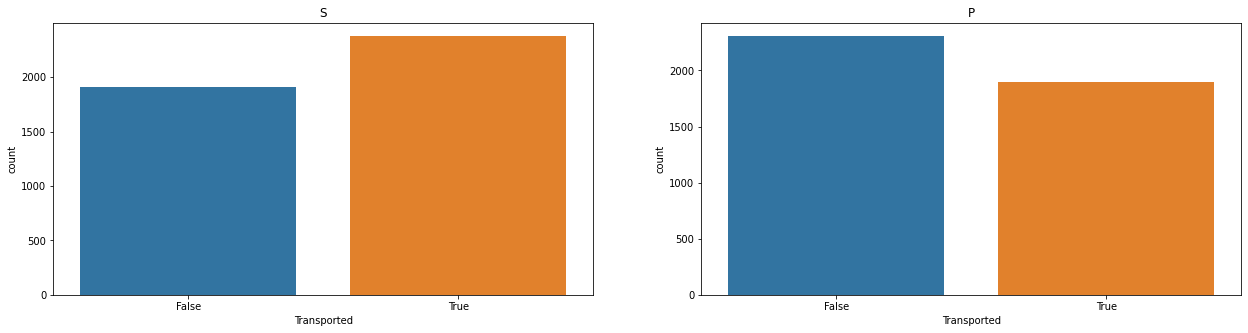

In [ ]:
df['Port']=df['Cabin'].str[-1]
category_comp_plot(df,'Port','Transported')

##Checking significance of Destination

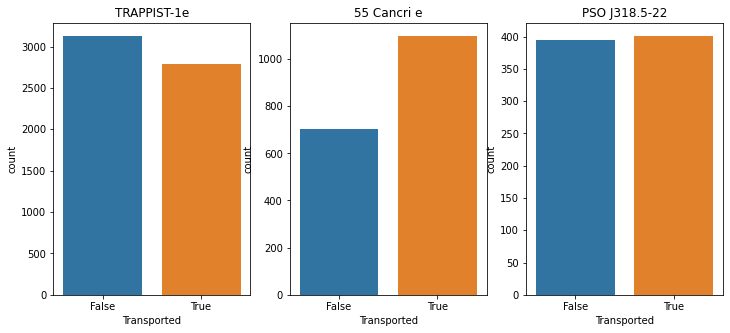

In [ ]:
category_comp_plot(df,'Destination','Transported')

## Check Significance of RoomService

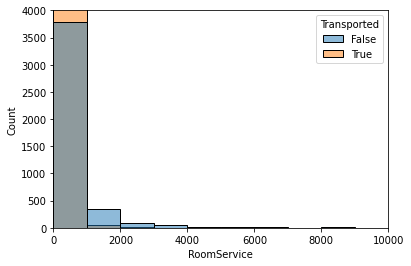

In [ ]:
numeric_comp_plot(df,'RoomService',forCol='Transported',binwidth=1000,xlim=[0,10000],ylim=[0,4000])

### Insights:

1)Looks like people who spent more on RoomService have a higher chance of evading transport

# Checking significance of ShoppingMall

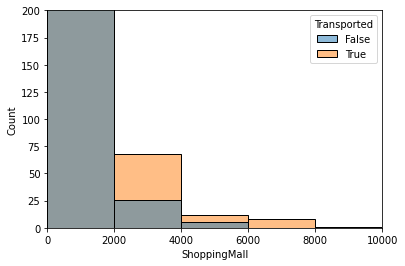

In [ ]:
numeric_comp_plot(df,'ShoppingMall',forCol='Transported',binwidth=2000,xlim=[0,10000],ylim=[0,200])

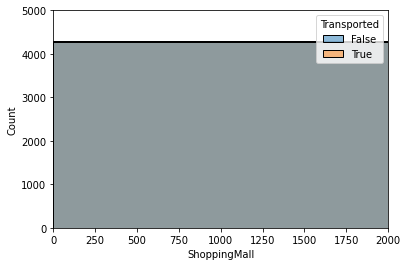

In [ ]:
numeric_comp_plot(df,'ShoppingMall',forCol='Transported',binwidth=2000,xlim=[0,2000],ylim=[0,5000])

### Insights 

1)Looks like people who spent more on/in ShoppingMall have a higher chance of being transported

# Checking significance of Spa

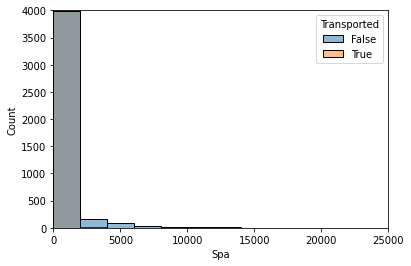

In [ ]:
numeric_comp_plot(df,'Spa',forCol='Transported',binwidth=2000,xlim=[0,25000],ylim=[0,4000])

### Insights:
1)Looks like people who spent more on/in Spa have a higher chance of evading transport

# Checking significance of VRDeck

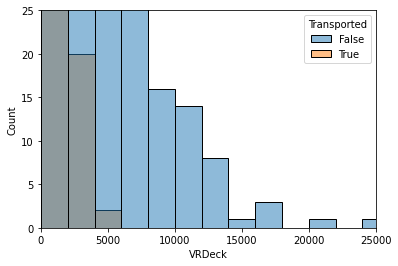

In [ ]:
numeric_comp_plot(df,'VRDeck',forCol='Transported',binwidth=2000,xlim=[0,25000],ylim=[0,25])

### Insights:
1)Looks like people who spent more on/in VRDeck have a higher chance of evading transport

# Checking significance of FoodCourt

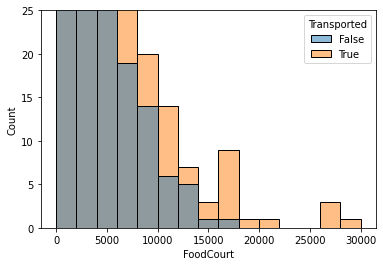

In [ ]:
numeric_comp_plot(df,'FoodCourt',forCol='Transported',binwidth=2000,ylim=[0,25])

### Insights:
1)Looks like people who spent more on/in FoodCourt have a higher chance of being transported

## Checking amount of money spent by different age groups 

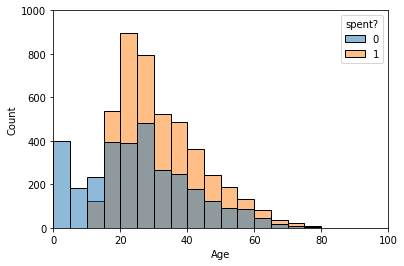

In [ ]:
spentNadf=df.dropna(subset=['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','VIP'])
spentNadf['TotalSpent']=spentNadf['RoomService']+spentNadf['FoodCourt']+spentNadf['ShoppingMall']+spentNadf['Spa']+spentNadf['VRDeck']
spentNadf['spent?']=spentNadf['TotalSpent'].apply(lambda x: 1 if x>0 else 0)
numeric_comp_plot(spentNadf,'Age','spent?',binwidth=5,xlim=[0,100],ylim=[0,1000])

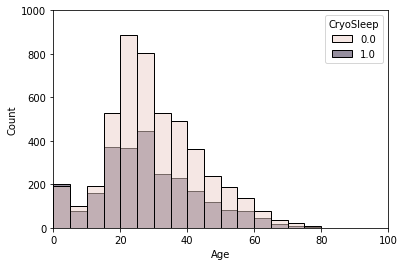

In [ ]:
numeric_comp_plot(spentNadf,'Age','CryoSleep',binwidth=5,xlim=[0,100],ylim=[0,1000])

People in the age group between 1-20 spent little to no money.
Might come in handy while imputing age




# Checking significance of PassengerId by splitting it into parts

## GroupSize

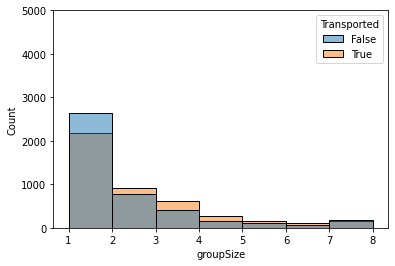

In [ ]:
df[['P_ID1','P_ID2']]=df['PassengerId'].str.split('_',expand=True)[[0,1]]
df['groupSize']=df.groupby(['P_ID1'])['P_ID1'].transform('count')
numeric_comp_plot(df,'groupSize',forCol='Transported',binwidth=1,ylim=[0,5000])

## P_ID1

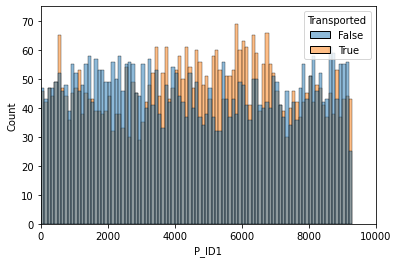

In [ ]:
df[['P_ID1','P_ID2']]=df['PassengerId'].str.split('_',expand=True)[[0,1]]
df['P_ID1']=df['P_ID1'].astype('int')
numeric_comp_plot(df,'P_ID1',forCol='Transported',binwidth=100,xlim=[0,10000],ylim=[0,75])

### IDs are usually considered useless for predictions,but from the plot it is clear that having a P_ID1 between ~3000 to ~7000 might end up in bad news 😯

## P_ID2

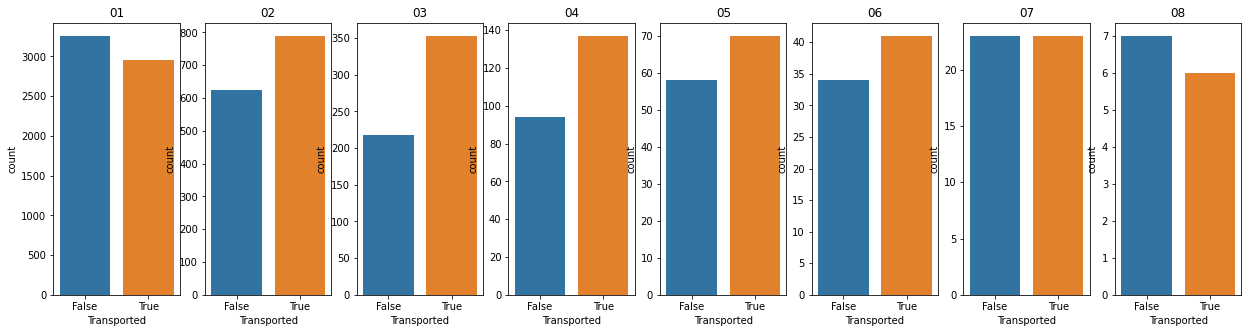

In [ ]:
df[['P_ID1','P_ID2']]=df['PassengerId'].str.split('_',expand=True)[[0,1]]
category_comp_plot(df,'P_ID2','Transported')

# Checking significance of Age

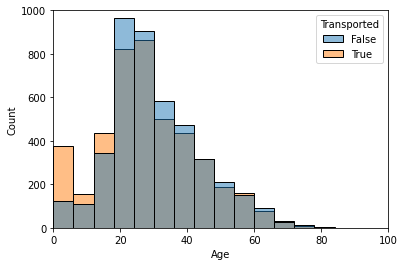

In [ ]:
numeric_comp_plot(df,'Age','Transported',binwidth=6,xlim=[0,100],ylim=[0,1000])

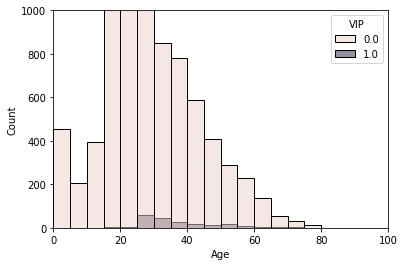

In [ ]:
numeric_comp_plot(df,'Age','VIP',binwidth=5,xlim=[0,100],ylim=[0,1000])

### Toddlers and Teenager have a high chance of being transported 

### Using names to generate Features

In [ ]:
df['lastName']=df['Name'].dropna().str.split(' ').apply(lambda x:x[1])
#Using Last name to to assign people to their respective families and getting the family count.
df['family_size']=df.groupby(['lastName'])['lastName'].transform('count')
#Checking whether there's a vip in the family
df['vipInFamily']=df.groupby(['lastName'])['VIP'].transform(lambda x: True if x.sum()>0 else False)

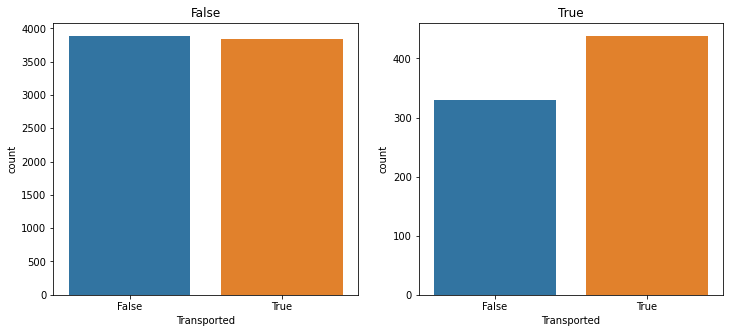

In [ ]:
category_comp_plot(df,'vipInFamily','Transported')

# Checking Significance of family size

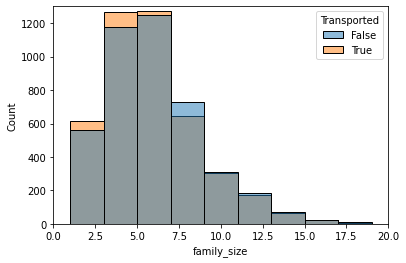

In [ ]:
numeric_comp_plot(df,'family_size','Transported',binwidth=2,xlim=[0,20],ylim=[0,1300])

In [ ]:
df['withFamily']=df['family_size'].apply(lambda x:1 if x>1 else 0)


### Insights


1.   Looks like huge families have high chance of evading transport



# Generating heatmaps to find corrleation between features

## Comparing HomePlanet and Deck 

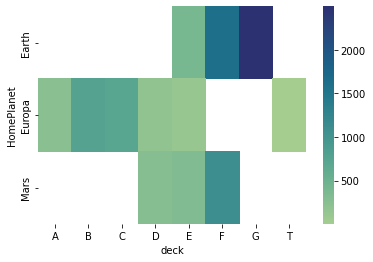

In [ ]:
PlanetDeckPivot=pd.pivot_table(df,index='HomePlanet',columns='deck',values='PassengerId',aggfunc=len)
sns.heatmap(PlanetDeckPivot, cmap="crest")
plt.show()

In [ ]:
df.loc[df['VIP']==True]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Transported,deck,Cabin_Num,Port,P_ID1,P_ID2,groupSize,lastName,family_size,vipInFamily
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,False,A,0,S,0003,01,2,Susent,6.0,True
108,0112_01,Europa,False,B/1/S,55 Cancri e,48.0,True,0.0,2537.0,87.0,...,True,B,1,S,0112,01,1,Cowtale,2.0,True
120,0128_01,Mars,False,D/3/S,TRAPPIST-1e,61.0,True,2353.0,334.0,9.0,...,False,D,3,S,0128,01,2,Fles,2.0,True
214,0224_01,Mars,False,F/42/S,TRAPPIST-1e,32.0,True,181.0,0.0,5.0,...,False,F,42,S,0224,01,1,Queen,1.0,True
291,0321_01,NaN,False,F/61/S,TRAPPIST-1e,59.0,True,1018.0,0.0,209.0,...,False,F,61,S,0321,01,1,Bache,5.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8579,9158_01,Europa,True,B/298/P,55 Cancri e,30.0,True,0.0,0.0,0.0,...,True,B,298,P,9158,01,1,Maglible,1.0,True
8614,9194_02,Europa,False,E/603/S,TRAPPIST-1e,32.0,True,1003.0,909.0,0.0,...,False,E,603,S,9194,02,2,Subwor,2.0,True
8621,9197_02,Europa,False,C/308/P,NaN,41.0,True,0.0,7964.0,0.0,...,False,C,308,P,9197,02,4,Platch,9.0,True
8652,9230_01,Europa,False,C/342/S,TRAPPIST-1e,36.0,True,0.0,5600.0,715.0,...,True,C,342,S,9230,01,1,NaN,NaN,NaN


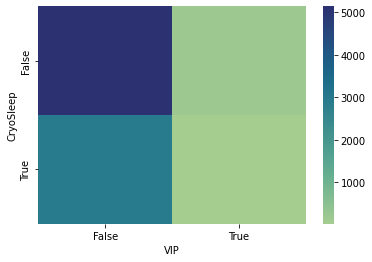

In [ ]:
PlanetDeckPivot=pd.pivot_table(df,index='CryoSleep',columns='VIP',values='PassengerId',aggfunc=len)
sns.heatmap(PlanetDeckPivot, cmap="crest")
plt.show()

## Insights:

1.   People in deck G are from Earth  
2.   People from deck A,B,C,T are from Europa.

Will be used for imputations 




## Comparing HomePlanet and Deck 

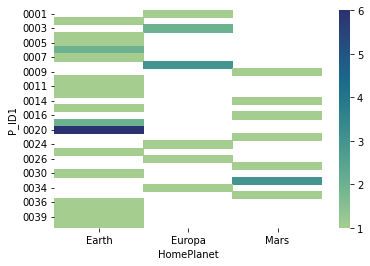

In [ ]:
PidPlanetPivot=pd.pivot_table(df,index='P_ID1',columns='HomePlanet',values='PassengerId',aggfunc=len).head(30)
sns.heatmap(PidPlanetPivot, cmap="crest")
plt.show()

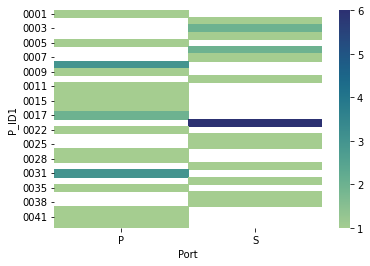

In [ ]:
PidPort=pd.pivot_table(df,index='P_ID1',columns='Port',values='PassengerId',aggfunc=len).head(30)
sns.heatmap(PidPort, cmap="crest")
plt.show()

## Insights:

1.   People having the same P_ID1 are from the same HomePlanet


Will be used for imputations 

# Checking Null Values

In [ ]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

# Estimators

## Some transformers made for the task at hand

In [8]:
#Imputer to fill in median values
class Int_Imputer(BaseEstimator,TransformerMixin):
  def __init__(self,cols):
    self.cols=cols
  def fit(self,X,y=None):
    return self
  def transform(self,X,y=None):
    imputer=SimpleImputer(strategy="median")
    imputer.fit(X[self.cols])
    X[self.cols]=imputer.transform(X[self.cols])
  
    return X
  

#Transformer to add some new features
class AttriAdder(BaseEstimator,TransformerMixin):

  def __init__(self):
    pass
  def fit(self,X,y=None):
    return self
  def transform(self,X,y=None):
    #EscapeSpent is the sum of those features which on spending highly on will result in high chance of escaping transport
    X['EscapeSpent']=X['RoomService']+X['Spa']+X['VRDeck']
    #DeathSpent is the sum of those features which on spending highly on will result in high chance of transport
    X['DeathSpent']=X['FoodCourt']+X['ShoppingMall']
    X['TotalSpent']=X['RoomService']+X['FoodCourt']+X['ShoppingMall']+X['Spa']+X['VRDeck']
    X['AgeBelow20']=X['Age'].apply(lambda x:1 if x<20 else 0)
    X['spent?']=(X['EscapeSpent']+X['DeathSpent']).apply(lambda x:1 if x>0 else 0)
    X['withFamily']=X['family_size'].apply(lambda x:1 if x>1 else 0)

    return X

#Transformer to convert categorical features to ordinal values
class OrdEncoding(BaseEstimator,TransformerMixin):

  def __init__(self,cols):
    self.cols=cols
  def fit(self,X,y=None):
    return self
  def transform(self,X,y=None):
    ord=OrdinalEncoder()
    for col in self.cols:
      X[col]=ord.fit_transform(X[[col]])

    return X

#Transformer to convert categorical features to one hot values
class OneHot(BaseEstimator,TransformerMixin):

  def __init__(self,cols):
    self.cols=cols
  def fit(self,X,y=None):
    return self
  def transform(self,X,y=None):
    
    for col in self.cols:
      one=OneHotEncoder(sparse=False)
      X[list(one.categories_[0])]=one.fit_transform(X[[col]])
      print(list(one.categories_[0]))

    return X

#Transformer to change type of features
class TypeChange(BaseEstimator,TransformerMixin):

  def __init__(self,cols_dict):
    self.cols_dict=cols_dict
  def fit(self,X,y=None):
    return self
  def transform(self,X,y=None):
    for col in self.cols_dict:
      X[col]=X[col].astype(self.cols_dict[col])
    return X

#Transformer to drop specified columns from the dataframe
class dropCols(BaseEstimator,TransformerMixin):

  def __init__(self,to_drop):
    self.to_drop=to_drop
  def fit(self,X,y=None):
    return self
  def transform(self,X,y=None):
    X=X.drop(columns=self.to_drop,axis=1)
    return X

#Transformer to keep only the mentioned features
class Keepcols(BaseEstimator,TransformerMixin):

  def __init__(self,to_keep):
    self.to_keep=to_keep
  def fit(self,X,y=None):
    return self
  def transform(self,X,y=None):
    X=X[self.to_keep]
    return X

#Transformer to scale features
class Scaler(BaseEstimator,TransformerMixin):
  def __init__(self,cols=None):
    self.cols=cols
    pass
  def fit(self,X,y=None):
    return self
  def transform(self,X,y=None):
    if self.cols==None:
      self.cols=X.columns
    scaler=StandardScaler()
    X[self.cols]=scaler.fit_transform(X[self.cols])
    return X

#Imputer which will fill missing values with the mode of that feature
class ModeImputer(BaseEstimator,TransformerMixin):
  def __init__(self,cols):
    self.cols=cols
    
  def fit(self,X,y=None):
    return self
  def transform(self,X,y=None):
    for i in self.cols:
      cat_imputer=CategoricalImputer()
      X[i]=cat_imputer.fit_transform(X[i])
    return X

#Transformer to bin the specified feature.
class Binner(BaseEstimator,TransformerMixin):
  def __init__(self,cols,labels=False,cats=4):
    self.cols=cols
    self.cats=cats
    self.labels=labels
  def fit(self,X,y=None):
    return self
  def transform(self,X,y=None):
    for i in self.cols:
      X[i]=pd.qcut(X[i],self.cats,labels=self.labels)
    return X

#Imputer which will impute the feature with the specified value
class Value_Imputer(BaseEstimator,TransformerMixin):
  def __init__(self,col_val):
    self.col_val=col_val
  def fit(self,X,y=None):
    return self
  def transform(self,X,y=None):
    for i in self.col_val:
      X[i]=X[i].fillna(value=self.col_val[i])
    return X


# Defining the training dataframe

In [48]:
df=pd.read_csv('./drive/MyDrive/spaceTitanic/train.csv')
testKag=pd.read_csv('./drive/MyDrive/spaceTitanic/test.csv')
df[['P_ID1','P_ID2']]=df['PassengerId'].str.split('_',expand=True)[[0,1]]
df[['deck','num','side']]=df['Cabin'].str.split('/',expand=True)[[0,1,2]]
df['groupSize']=df.groupby(['P_ID1'])['P_ID1'].transform('count')
df['lastName']=df['Name'].str.split(' ',expand=True)[1]
testKag['lastName']=testKag['Name'].str.split(' ',expand=True)[1]
# df['family_size']=df.groupby(['lastName'])['P_ID1'].transform('count')


In [49]:
all_last_names=pd.concat([df['lastName'],testKag['lastName']]).reset_index()
df=pd.merge(df,all_last_names.groupby(['lastName'])['index'].agg('count').reset_index().rename(columns={'index':'family_size'}),how='left',on='lastName',suffixes=['_train','_all'])

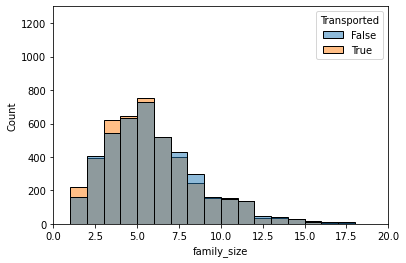

In [ ]:
numeric_comp_plot(df,'family_size','Transported',binwidth=1,xlim=[0,20],ylim=[0,1300])

## Dictionary in the form {'p_id1':Mode of homePlanet for that pid1}  

In [50]:
noNaPlanetdf=df.copy()
noNaPlanetdf=noNaPlanetdf.dropna(subset=['HomePlanet'])
id_to_planet=noNaPlanetdf.groupby(by='P_ID1')['HomePlanet'].agg(pd.Series.mode).to_dict()

## Dictionary in the form {'lastName':Mode of destination for that lastName}

In [51]:
noNaDstLnamedf=df.copy()
noNaDstLnamedf=noNaDstLnamedf.dropna(subset=['Destination','lastName'])
lname_to_Destination=noNaDstLnamedf.groupby(by='lastName')['Destination'].agg(lambda x:pd.Series.mode(x).tolist()[-1]).to_dict()

### Imputing HomePlanet
Steps:


1.   Filling in null values based on the deck that the passenger is in. 
2.   Filling in null values based on the p_id1 of that passenger.



In [52]:
def HomePlanetImpute(df):
  deck_to_cab={'A':'Europa','C':'Europa','B':'Europa','T':'Europa','G':'Earth'}
  for i in deck_to_cab:
    df.loc[(df['deck']==i) & df['HomePlanet'].isna(),'HomePlanet']=df.loc[(df['deck']==i) & df['HomePlanet'].isna(),'HomePlanet'].fillna(
        value=deck_to_cab.get(i))
  for i in df.loc[df['HomePlanet'].isnull()].index:
    df.loc[i,'HomePlanet']=id_to_planet.get(df.loc[i,'P_ID1'],'Earth')
  return df

### Imputing CryoSleep

Passengers who are in cryosleep dont spend any money

Steps:
1.   Filling in True where total money spent is 0




In [53]:
def CryoSleepImpute(df):
  df.loc[(df['CryoSleep'].isna()) & (df['Age']<=15),'CryoSleep']=True
  df['tot']=df['RoomService']+df['Spa']+df['VRDeck']+df['FoodCourt']+df['ShoppingMall']
  df.loc[(df['CryoSleep'].isna()) & (df['tot']==0),'CryoSleep']=True
  df['CryoSleep']=df['CryoSleep'].fillna(value=False)
  return df


### Imputing ammenities features

Passengers who are in cryosleep dont spend any money.
Passengers below the age of 18 don't spend any money.

Steps:
1.   Filling in 0's where CryoSleep is True
2.   Filling in 0's where age below 18




In [54]:
def SpentImpute(df):
  for i in ['RoomService','Spa','VRDeck','FoodCourt','ShoppingMall']:
    df.loc[(df[i].isna()) & (df['CryoSleep']==True),i]=0
    df.loc[(df[i].isna()) & (df['Age']<18),i]=0
  return df


### Imputing Destination
Steps:


1.   Filling in null values based on the last name of passenger. 





In [55]:
def DestinationImpute(df):
  for i in df.loc[df['Destination'].isnull()].index:
    df.loc[i,'Destination']=lname_to_Destination.get(df.loc[i,'lastName'],'TRAPPIST-1e')
  return df

### Imputing Cabin

In [56]:
group_to_port=df.loc[~df['side'].isna()].groupby(by='P_ID1')['side'].agg(lambda x:pd.Series.mode(x)).to_dict()
def CabinImpute(df):
  for i in df.loc[df['side'].isnull()].index:
    df.loc[i,'side']=group_to_port.get(df.loc[i,'P_ID1'],'S')
  return df

In [57]:
df=HomePlanetImpute(df)
df=CryoSleepImpute(df)
df=SpentImpute(df)
df=DestinationImpute(df)
df=CabinImpute(df)

In [ ]:
df['side'].value_counts()

S    4442
P    4251
Name: side, dtype: int64

# Shuffling and separating the labels

In [58]:
df=df.sample(frac=1,random_state=42)
labels=df['Transported'].astype(int)
df=df.drop(columns=['Transported'])

In [ ]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Name,P_ID1,P_ID2,deck,num,side,groupSize,lastName,family_size,tot
304,0337_02,Mars,False,F/63/S,TRAPPIST-1e,19.0,False,417.0,349.0,634.0,...,Weros Perle,0337,02,F,63,S,3,Perle,4.0,2460.0
2697,2891_01,Earth,False,G/460/S,TRAPPIST-1e,18.0,False,4.0,904.0,0.0,...,Gleney Ortinericey,2891,01,G,460,S,1,Ortinericey,1.0,909.0
8424,8998_01,Earth,True,G/1449/S,TRAPPIST-1e,41.0,False,0.0,0.0,0.0,...,Gerry Englence,8998,01,G,1449,S,2,Englence,6.0,0.0
1672,1771_01,Earth,False,G/291/P,TRAPPIST-1e,35.0,False,0.0,338.0,436.0,...,Antone Cardner,1771,01,G,291,P,1,Cardner,10.0,NaN
8458,9034_02,Europa,True,D/288/P,TRAPPIST-1e,43.0,False,0.0,0.0,0.0,...,Errairk Crakete,9034,02,D,288,P,5,Crakete,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,6076_01,Earth,False,G/988/S,TRAPPIST-1e,18.0,False,14.0,2.0,144.0,...,Therry Cames,6076,01,G,988,S,1,Cames,3.0,770.0
5191,5537_01,Mars,False,F/1063/S,TRAPPIST-1e,50.0,NaN,690.0,0.0,30.0,...,Herms Bancy,5537,01,F,1063,S,1,Bancy,4.0,1910.0
5390,5756_06,Earth,False,F/1194/P,PSO J318.5-22,22.0,False,158.0,0.0,476.0,...,Karena Briggston,5756,06,F,1194,P,8,Briggston,13.0,660.0
860,0925_01,Mars,False,F/191/P,TRAPPIST-1e,34.0,False,379.0,0.0,1626.0,...,Skix Kraie,0925,01,F,191,P,3,Kraie,5.0,2005.0


# Defining the pipeline

In [59]:
cat_Pipe=Pipeline([('val_imp',Value_Imputer({'Age':df['Age'].median(),'RoomService':df['RoomService'].median(),
                                            'FoodCourt':df['FoodCourt'].median(),'ShoppingMall':df['ShoppingMall'].median()
                                            ,'Spa':df['Spa'].median(),'VRDeck':df['VRDeck'].median(),
                                            'HomePlanet':df['HomePlanet'].mode().values[0],
                                            'CryoSleep':df['CryoSleep'].mode().values[0],
                                            'Destination':df['Destination'].mode().values[0],
                                            'VIP':df['VIP'].mode().values[0],'side':df['side'].mode().values[0],
                                             'deck':df['deck'].mode().values[0],'num':df['num'].median(),'family_size':1.0})),
                   ('typ_change',TypeChange({'P_ID1':np.int64,'num':np.int64,'CryoSleep':np.int64,'VIP':np.int64})),
                    ('attri_adder',AttriAdder()),
                    ('binner',Binner(cols=['Age'],cats=6,labels=['toddler','kids','early_adults','late_adults','senior_citizen','super_old'])),
                    ('keep_cls',Keepcols(['EscapeSpent','DeathSpent','HomePlanet','CryoSleep','side','VIP','Age',
                                          'Destination',
                                          'P_ID2','deck','groupSize','num','P_ID1','family_size','AgeBelow20','spent?','withFamily'])),
                    ],verbose=False)


In [60]:
cat_df=cat_Pipe.fit_transform(df)


In [21]:
cat_df.isna().sum()

EscapeSpent    0
DeathSpent     0
HomePlanet     0
CryoSleep      0
side           0
VIP            0
Age            0
Destination    0
P_ID2          0
deck           0
groupSize      0
num            0
P_ID1          0
family_size    0
AgeBelow20     0
spent?         0
withFamily     0
dtype: int64

### Encoding the categorical labels using the encoder implemented by the CatBoostClassier 

In [61]:
catEncoder=ce.cat_boost.CatBoostEncoder(cols=['HomePlanet','side','Destination','deck','P_ID2','Age'])
encoded_cat_df=catEncoder.fit_transform(cat_df,labels)

### Splitting into training and test sets

In [62]:
cat_train,cat_test,train_labels,test_labels=train_test_split(cat_df,labels,test_size=0.1,random_state=42)
encoded_cat_train,encoded_cat_test,train_labels,test_labels=train_test_split(encoded_cat_df,labels,test_size=0.1,random_state=42)



In [ ]:
cat_train.isna().sum()

EscapeSpent    0
DeathSpent     0
HomePlanet     0
CryoSleep      0
side           0
VIP            0
Age            0
Destination    0
P_ID2          0
deck           0
groupSize      0
num            0
P_ID1          0
family_size    0
AgeBelow20     0
spent?         0
withFamily     0
dtype: int64

# Feature Selection Using Boruta

In [63]:
cat_boruta_model=CatBoostClassifier(verbose=False,eval_metric='Accuracy')
Feature_Selector = BorutaShap(model=cat_boruta_model,
                              importance_measure='shap',
                              classification=True)
Feature_Selector.fit(X=encoded_cat_train, y=train_labels, n_trials=100, sample=False,
            	     train_or_test = 'test', normalize=True,
		     verbose=True)

  0%|          | 0/100 [00:00<?, ?it/s]

11 attributes confirmed important: ['num', 'side', 'Destination', 'deck', 'HomePlanet', 'EscapeSpent', 'spent?', 'DeathSpent', 'P_ID1', 'family_size', 'CryoSleep']
6 attributes confirmed unimportant: ['groupSize', 'Age', 'P_ID2', 'AgeBelow20', 'VIP', 'withFamily']
0 tentative attributes remains: []


## Even though family_size is rendered unimportant by the boruta shap algorithm, it lead to increase in accuracy when taken into consideration.

In [83]:
# cat_train_filtered=encoded_cat_train[Feature_Selector.Subset().columns]
cat_train_filtered=cat_train[['num', 'side', 'Destination', 'deck', 'HomePlanet', 'EscapeSpent', 'spent?', 'DeathSpent', 'P_ID1', 'CryoSleep', 'family_size']]
cat_df_filtered=cat_df[cat_train_filtered.columns]
cat_test_filtered=cat_test[cat_train_filtered.columns]

In [ ]:
cat_train_filtered.isna().sum()

Destination    0
deck           0
P_ID1          0
spent?         0
EscapeSpent    0
CryoSleep      0
num            0
DeathSpent     0
HomePlanet     0
side           0
family_size    0
dtype: int64

# Model Training

### Model Used:CatboostClassifier   

In [84]:
cat_filtered_model=CatBoostClassifier(cat_features=['HomePlanet','Destination','side','deck'],verbose=False,eval_metric='Accuracy')
cat_filtered_model.fit(cat_train_filtered,train_labels,eval_set=(cat_test_filtered, test_labels),verbose=False,early_stopping_rounds=200,use_best_model=True)

In [ ]:
cat_filtered_model.best_score_

{'learn': {'Accuracy': 0.8956921896970471, 'Logloss': 0.2600178094190429},
 'validation': {'Accuracy': 0.8413793103448276, 'Logloss': 0.3593195228501856}}

In [73]:
cat_filtered_model.best_score_

{'learn': {'Accuracy': 0.8797136648344624, 'Logloss': 0.2809911262919144},
 'validation': {'Accuracy': 0.8333333333333334,
  'Logloss': 0.36104132469874545}}

In [70]:
cat_filtered_model.best_score_

{'learn': {'Accuracy': 0.8564489326345391, 'Logloss': 0.31904529578053314},
 'validation': {'Accuracy': 0.832183908045977, 'Logloss': 0.36313076606146705}}

In [85]:
cat_filtered_model.best_score_

{'learn': {'Accuracy': 0.8564489326345391, 'Logloss': 0.31904529578053314},
 'validation': {'Accuracy': 0.832183908045977, 'Logloss': 0.36313076606146705}}

In [86]:
accuracy_score(test_labels,cat_filtered_model.predict(cat_test_filtered))

0.832183908045977

Observation:The model seems to be overfitting abit.

# Hyperparameter Tuning

In [41]:
grid = {'learning_rate': [0.01,0.03, 0.1],
        'depth': [4, 6, 10,15],
        'l2_leaf_reg': [0.1,1, 3, 5, 7, 9]}

In [87]:
cat_model=CatBoostClassifier(cat_features=['HomePlanet','Destination','side','deck'],verbose=False,eval_metric='Accuracy')
randomized_search_result = cat_model.randomized_search(grid,X=cat_train_filtered,
                                                    y=train_labels,
                                                    verbose=False,
                                                    refit=True)


bestTest = 0.8255591054
bestIteration = 64


bestTest = 0.8261980831
bestIteration = 320


bestTest = 0.8293929712
bestIteration = 605


bestTest = 0.8268370607
bestIteration = 321


bestTest = 0.8274760383
bestIteration = 664


bestTest = 0.828115016
bestIteration = 799


bestTest = 0.8274760383
bestIteration = 205


bestTest = 0.821086262
bestIteration = 286


bestTest = 0.8185303514
bestIteration = 48


bestTest = 0.8204472843
bestIteration = 291

Training on fold [0/3]

bestTest = 0.8009969325
bestIteration = 503

Training on fold [1/3]

bestTest = 0.8063650307
bestIteration = 994

Training on fold [2/3]

bestTest = 0.8220176448
bestIteration = 504



In [ ]:
randomized_search_result['params']

{'depth': 4, 'l2_leaf_reg': 1, 'learning_rate': 0.1}

In [ ]:
accuracy_score(test_labels,cat_model.predict(cat_test_filtered))

0.832183908045977

In [46]:
accuracy_score(test_labels,cat_model.predict(cat_test_filtered))

0.8229885057471265

In [89]:
accuracy_score(test_labels,cat_model.predict(cat_test_filtered))

0.8172413793103448

In [88]:
accuracy_score(train_labels,cat_model.predict(cat_train_filtered))

0.8354851080148281

In [ ]:
accuracy_score(train_labels,cat_model.predict(cat_train_filtered))

0.8839319953981848

#Test Data

In [90]:
df=pd.read_csv('./drive/MyDrive/spaceTitanic/train.csv')
testKag=pd.read_csv('./drive/MyDrive/spaceTitanic/test.csv')

In [91]:
PassengerIds=testKag['PassengerId']
testKag[['P_ID1','P_ID2']]=testKag['PassengerId'].str.split('_',expand=True)[[0,1]]
testKag[['deck','num','side']]=testKag['Cabin'].str.split('/',expand=True)[[0,1,2]]
testKag['groupSize']=testKag.groupby(['P_ID1'])['P_ID1'].transform('count')
testKag['lastName']=testKag['Name'].str.split(' ',expand=True)[1]
df['lastName']=df['Name'].str.split(' ',expand=True)[1]
all_last_names=pd.concat([df['lastName'],testKag['lastName']]).reset_index()
testKag=pd.merge(testKag,all_last_names.groupby(['lastName'])['index'].agg('count').reset_index().rename(columns={'index':'family_size'}),how='left',on='lastName')
# testKag['family_size']=testKag.groupby(['lastName'])['lastName'].transform('count')


In [ ]:
testKag

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VRDeck,Name,P_ID1,P_ID2,deck,num,side,groupSize,lastName,family_size
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,...,0.0,Nelly Carsoning,0013,01,G,3,S,1,Carsoning,8.0
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,...,0.0,Lerome Peckers,0018,01,F,4,S,1,Peckers,4.0
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,...,0.0,Sabih Unhearfus,0019,01,C,0,S,1,Unhearfus,6.0
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,...,585.0,Meratz Caltilter,0021,01,C,1,S,1,Caltilter,2.0
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,...,0.0,Brence Harperez,0023,01,F,5,S,1,Harperez,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,...,0.0,Jeron Peter,9266,02,G,1496,S,2,Peter,10.0
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,...,144.0,Matty Scheron,9269,01,NaN,NaN,NaN,1,Scheron,6.0
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,...,0.0,Jayrin Pore,9271,01,D,296,P,1,Pore,4.0
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,...,523.0,Kitakan Conale,9273,01,D,297,P,1,Conale,7.0


In [92]:
testKag=HomePlanetImpute(testKag)
testKag=CryoSleepImpute(testKag)
testKag=SpentImpute(testKag)
testKag=DestinationImpute(testKag)
testKag=CabinImpute(testKag)

In [ ]:
testKag.isna().sum()

EscapeSpent    0
DeathSpent     0
HomePlanet     0
CryoSleep      0
side           0
VIP            0
Age            0
Destination    0
P_ID2          0
deck           0
groupSize      0
num            0
P_ID1          0
family_size    0
spent?         0
dtype: int64

# Cat transform

In [93]:
testKag=cat_Pipe.fit_transform(testKag)
# testKag['spent?']=(testKag['EscapeSpent']+testKag['DeathSpent']).apply(lambda x:1 if x>0 else 0)
encodedTestKag=catEncoder.transform(testKag)
test_kag_filtered=testKag[cat_train_filtered.columns]


In [94]:
test_kag_filtered

,num,side,Destination,deck,HomePlanet,EscapeSpent,spent?,DeathSpent,P_ID1,CryoSleep,family_size
0,3,S,TRAPPIST-1e,G,Earth,0.0,0,0.0,13,1,8.0
1,4,S,TRAPPIST-1e,F,Earth,2823.0,1,9.0,18,0,4.0
2,0,S,55 Cancri e,C,Europa,0.0,0,0.0,19,1,6.0
3,1,S,TRAPPIST-1e,C,Europa,766.0,1,6652.0,21,0,2.0
4,5,S,TRAPPIST-1e,F,Earth,10.0,1,635.0,23,0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
4272,1496,S,TRAPPIST-1e,G,Earth,0.0,0,0.0,9266,1,10.0
4273,427,S,TRAPPIST-1e,F,Earth,154.0,1,864.0,9269,0,6.0
4274,296,P,55 Cancri e,D,Mars,0.0,0,0.0,9271,1,4.0
4275,297,P,TRAPPIST-1e,D,Europa,523.0,1,2680.0,9273,0,7.0


In [ ]:
test_kag_filtered['Destination'].value_counts()

TRAPPIST-1e      3034
55 Cancri e       854
PSO J318.5-22     389
Name: Destination, dtype: int64

In [95]:
def answer_dumper(model,file_name,df,ids):
  predictions=pd.DataFrame({'PassengerId':ids,'Transported':model.predict(df).astype('bool').reshape(-1,)})
  predictions.to_csv('./drive/MyDrive/spaceTitanic/'+file_name+'.csv')

In [96]:
cat_model.predict(test_kag_filtered)

array([1, 0, 1, ..., 1, 1, 1])

In [97]:
answer_dumper(cat_model,'cat_randomized_cabinimpute',test_kag_filtered,PassengerIds)